# Text Analytics and Natural Language Processing using Graphs

In the following we will focus on analyzing textual documents and leverage on graph analysis in order to identify insight and extract relevant information. 

In particular in the following we will show you how to:

* Extract structured information from text by using NLP techniques and models
* Build different type of graphs starting from the information extracted in the previous point
* Analyze the graph

# Step1:  Setup

In [ ]:
# install tensorflow will crash import spacy !!! requirements.txt has tensorflow commented out
#!pip3 install -r /Users/chang/Documents/dev/git/ml/Graph-Machine-Learning/Chapter07/requirements.txt

# Step2: Data Processing

### 2.1 Load Dataset

In [1]:
import os
os.getcwd()

'/Users/chang/Documents/dev/git/ml/Graph-Machine-Learning/Chapter07'

In [2]:
import nltk 

In [3]:
import numpy as np

import pandas as pd
import networkx as nx
print('DONE')

DONE


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
from nltk.corpus import reuters

In [7]:
corpus = pd.DataFrame([
    {"id": _id, "clean_text": reuters.raw(_id).replace("\n", ""), "label": reuters.categories(_id)}
    for _id in reuters.fileids()
]).set_index("id")
print('DONE')

DONE


In [8]:
corpus.iloc[10]["clean_text"]

'SUBROTO SAYS INDONESIA SUPPORTS TIN PACT EXTENSION  Mines and Energy Minister Subroto  confirmed Indonesian support for an extension of the sixth  International Tin Agreement (ITA), but said a new pact was not  necessary.      Asked by Reuters to clarify his statement on Monday in  which he said the pact should be allowed to lapse, Subroto said  Indonesia was ready to back extension of the ITA.      "We can support extension of the sixth agreement," he said.  "But a seventh accord we believe to be unnecessary."      The sixth ITA will expire at the end of June unless a  two-thirds majority of members vote for an extension.  '

In [9]:
corpus.shape

(10788, 2)

In [17]:
from collections import Counter
len(Counter([label for document_labels in corpus["label"] for label in document_labels]).most_common())

90

In [18]:
corpus.head()

,clean_text,label
id,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade]
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain]
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]"
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]"
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]"


### 2.2 Language Detection

#### Via langdetec module

In [10]:
import numpy as np
import langdetect
def getLanguage(text: str):
    try:
        return langdetect.detect(text)
    except: 
        return np.nan

In [11]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)
print('DONE')

DONE


In [21]:
corpus["language"].value_counts().head(10)

en    9890
sv     433
de     379
sw      29
so      25
pt       7
nl       7
vi       6
et       2
ca       2
Name: language, dtype: int64

In [18]:
corpus.head()

,clean_text,label,language
id,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en


#### Via fasttext module

In [12]:
!curl -w GET https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz > lid.176.ftz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  916k  100  916k    0     0  1601k      0 --:--:-- --:--:-- --:--:-- 1601k


In [13]:
import fasttext

m = fasttext.load_model("lid.176.ftz")
def getLanguage(text: str):
    return m.predict(text)[0][0].replace("__label__", "")

In [14]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)
print('DONE')

DONE


In [15]:
corpus["language"].value_counts().head(10)

en    10278
de       90
ja       73
it       67
sv       52
zh       48
es       31
fr       27
eu       20
eo       12
Name: language, dtype: int64

In [22]:
corpus[corpus["language"]=="ja"].iloc[5]["clean_text"]

'USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  '

### 2.3 NLP Enrichment Via Spacy
- via en_core_web_sm, use pipeline for entities and lemmatization

In [16]:
import spacy
print('DONE')

DONE


 Download spacy language model
```
!python3 -m spacy download en_core_web_sm
```

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
corpus["parsed"] = corpus["clean_text"].apply(nlp)
print('DONE')

DONE


In [28]:
corpus.loc["test/14832"]["clean_text"]

"THAI TRADE DEFICIT WIDENS IN FIRST QUARTER  Thailand's trade deficit widened to 4.5  billion baht in the first quarter of 1987 from 2.1 billion a  year ago, the Business Economics Department said.      It said Janunary/March imports rose to 65.1 billion baht  from 58.7 billion. Thailand's improved business climate this  year resulted in a 27 pct increase in imports of raw materials  and semi-finished products.      The country's oil import bill, however, fell 23 pct in the  first quarter due to lower oil prices.      The department said first quarter exports expanded to 60.6  billion baht from 56.6 billion.      Export growth was smaller than expected due to lower  earnings from many key commodities including rice whose  earnings declined 18 pct, maize 66 pct, sugar 45 pct, tin 26  pct and canned pineapples seven pct.      Products registering high export growth were jewellery up  64 pct, clothing 57 pct and rubber 35 pct.  "

In [29]:
from spacy import displacy

In [24]:
displacy.render(corpus.loc["test/14832"]["parsed"], style='ent', jupyter=True)

In [30]:
corpus.head()

,clean_text,label,language,parsed
id,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,..."


### 2.4 Save process corpus to disk

In [18]:
corpus[["clean_text", "label", "language", "parsed"]].to_pickle("corpus.p")



# Step3: Create Graph From Corpus of Documents

In the following, we will show you how to create two different kind of graphs out of a corpus of documents:

* Knowledge base graphs, where the subject-verb-object relation will be encoded to build a semantic graph 
* Bipartite graphs, linking documents with the entities/keywords appearing therein

### 3.1 Knowledge base

In [49]:
from subject_object_extraction import findSVOs

/Users/chang/Documents/dev/git/ml/Graph-Machine-Learning/Chapter07/subject_object_extraction.py:146: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if output is "str":
/Users/chang/Documents/dev/git/ml/Graph-Machine-Learning/Chapter07/subject_object_extraction.py:150: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif output is "obj":


In [56]:
corpus["triplets"] = corpus["parsed"].apply(lambda x: findSVOs(x, output="obj"))
print('DONE')

DONE


In [57]:
corpus.head(2)

,clean_text,label,language,parsed,triplets
id,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(DAILY, (SAYS, False), EAT), (survey, (showed..."


In [58]:
edge_list = [
    {"id": _id, "source": source.lemma_.lower(), "target": target.lemma_.lower(), "edge": edge.lemma_.lower()}
    for _id, triplets in corpus["triplets"].iteritems()
    for (source, (edge, neg), target) in triplets
]
edge_list[:2]

[{'id': 'test/14826',
  'source': 'exporters',
  'target': 'damage',
  'edge': 'fear'},
 {'id': 'test/14826', 'source': 'japan', 'target': 'fear', 'edge': 'raise'}]

In [59]:
edges = pd.DataFrame(edge_list)

In [60]:
edges["edge"].value_counts().head(10)

be         8085
have       2496
include    1853
say        1796
tell       1594
sell       1459
buy        1382
take       1121
make       1066
raise      1055
Name: edge, dtype: int64

In [61]:
import networkx as nx

In [62]:
G=nx.from_pandas_edgelist(edges, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [63]:
len(G.nodes)

7903

In [68]:
type(nx.degree(G))

networkx.classes.reportviews.DiMultiDegreeView

In [64]:
def plotDistribution(serie: pd.Series, nbins: int, minValue=None, maxValue=None):
    _minValue=int(np.floor(np.log10(minValue if minValue is not None else serie.min())))
    _maxValue=int(np.ceil(np.log10(maxValue if maxValue is not None else serie.max())))
    bins = [0] + list(np.logspace(_minValue, _maxValue, nbins)) + [np.inf]
    serie.hist(bins=bins)
    plt.xscale("log")

In [65]:
def graphSummary(graph, bins=10):
    print(nx.info(graph))
    plt.figure(figsize=(20, 8))
    plt.subplot(1,2,1)
    degrees = pd.Series({k: v for k, v in nx.degree(graph)})
    plt.yscale("log")
    plotDistribution(degrees, bins)
    try:
        plt.subplot(1,2,2)
        allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in graph.edges(data=True)})
        plotDistribution(allEdgesWeights, bins)
        plt.yscale("log")
    except:
        pass

In [36]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 7576
Number of edges: 72263
Average in degree:   9.5384
Average out degree:   9.5384


Name: 
Type: MultiDiGraph
Number of nodes: 7576
Number of edges: 72263
Average in degree:   9.5384
Average out degree:   9.5384


/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


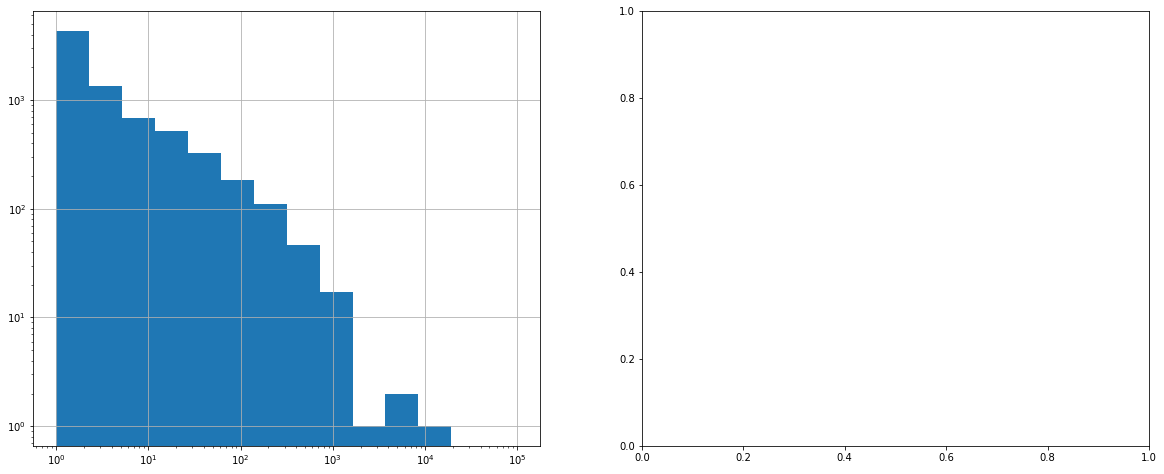

In [37]:
graphSummary(G, bins=15)

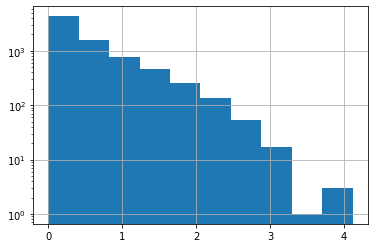

In [38]:
import numpy as np
np.log10(pd.Series({k: v for k, v in nx.degree(G)}).sort_values(ascending=False)).hist()
plt.yscale("log")

Analysis of a certain relation

In [69]:
edges.head()

,id,source,target,edge
0,test/14826,exporters,damage,fear
1,test/14826,japan,fear,raise
2,test/14826,row,damage,inflict
3,test/14826,they,correspondent,tell
4,test/14826,move,sentiment,boost


In [70]:
e = edges[(edges["source"]!=" ") & (edges["target"]!=" ") & (edges["edge"]=="lend")]

In [71]:
G=nx.from_pandas_edgelist(e, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

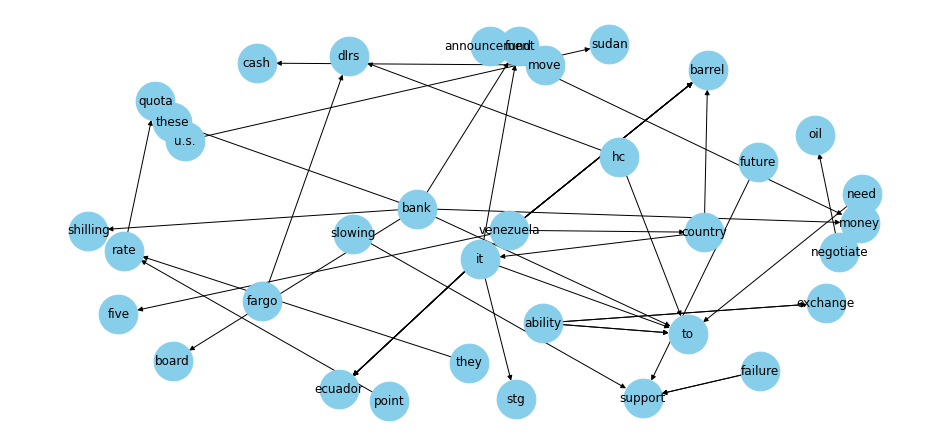

<Figure size 432x288 with 0 Axes>

In [75]:
import os

plt.figure(figsize=(13, 6))

pos = nx.spring_layout(G, k=1.2) # k regulates the distance between nodes

nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_size=12)

plt.show()
plt.savefig(os.path.join(".", "KnowledgeGraph.png"), dpi=300, format="png")

## 3.2 Bipartite Graph [p240]
```
* Connect document to entities that appear in text. THIS IS WHAT I NEEDED in RIVER2

* KG are good to query against aggregated entities (ie noun, aspects, etc) But KG is not good for clustering documents semantically. KG is not good at finding indirect relationships, like similar products, that do not occur in the same setence (ie bad generalization)> To Overcome this, we will encode document in form of a bipartite graph.

* Bipartite graph in detail:
	- For each document, extract entities. The document is represenent as a node; entities in the document are connection to thos document node. A document has 1:n relationhip to entity node. An entity can be refered by multiple document nodes.  2 Documents sharing similar entities are similar. This similarity can be used to project the bipartite graph to a particular set of nodes, ie document OR entity

```

#### 3.2.1: Extract the keywords from the documents
There are a couple of options to extract key entities of a document
- TF-IDF :  
- TextRank: Is a graph-based ranking model for text processing which can be used in order to find the most relevant sentences in text and also to find keywords. (https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf)+ BM25 
- NER (function below extract_entities) : uses spacy's NER


In [19]:
import gensim
from gensim.summarization import keywords 

In [21]:
text = corpus["clean_text"][0]
text

'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT  Mounting trade friction between the  U.S. And Japan has raised fears among many of Asia\'s exporting  nations that the row could inflict far-reaching economic  damage, businessmen and officials said.      They told Reuter correspondents in Asian capitals a U.S.  Move against Japan might boost protectionist sentiment in the  U.S. And lead to curbs on American imports of their products.      But some exporters said that while the conflict would hurt  them in the long-run, in the short-term Tokyo\'s loss might be  their gain.      The U.S. Has said it will impose 300 mln dlrs of tariffs on  imports of Japanese electronics goods on April 17, in  retaliation for Japan\'s alleged failure to stick to a pact not  to sell semiconductors on world markets at below cost.      Unofficial Japanese estimates put the impact of the tariffs  at 10 billion dlrs and spokesmen for major electronics firms  said they would virtually halt exports of products 

In [22]:
corpus["keywords"] = corpus["clean_text"].apply(
    lambda text: keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)
)

In [23]:
corpus.head(2)

,clean_text,label,language,parsed,keywords
id,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(trading, 0.4615130639538529), (said, 0.31598..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(vermin, 0.31206143802871816), (daily, 0.2611..."


In [24]:
# parsed column is from spacy pipeline; which includes lemma and ents

tmp = corpus["parsed"].apply(lambda x: x.ents)
tmp

id
test/14826       ((U.S.-JAPAN), (U.S.), (Japan), (Asia), (Reute...
test/14828       ((DAILY), (PCT, GRAIN, STOCKS,  , A), (19), (s...
test/14829       ((JAPAN), (MITI), (August), (Japanese), (MITI)...
test/14832       ((THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUA...
test/14833       ((INDONESIA, SEES, CPO), (Indonesia), (between...
                                       ...                        
training/999     ((U.K.), (The, Bank, of, England), (450), (mor...
training/9992    ((KNIGHT, -, RIDDER, INC, &, lt;KRN), (25), (2...
training/9993    ((TECHNITROL, INC, &, lt;TNL, >, SETS), (12), ...
training/9994    ((NATIONWIDE, CELLULAR, SERVICE, INC, &, lt;NC...
training/9995    ((52), (41), (49), (1,916,000), (2,281,000), (...
Name: parsed, Length: 10788, dtype: object

#### 3.2.2 Extract entities via spacy's NER model

In [25]:
# Takes the corpus['parsed'] column, and create 3-columns related to spacy's 3 type of entities 
def extractEntities(ents, minValue=1, typeFilters=["GPE", "ORG", "PERSON"]):
    entities = pd.DataFrame([
        {"lemma": e.lemma_, "lower": e.lemma_.lower(), "type": e.label_}
        for e in ents if hasattr(e, "label_")
    ])

    if len(entities)==0:
        return pd.DataFrame()
    
    g = entities.groupby(["type", "lower"])

    summary = pd.concat({
        "alias": g.apply(lambda x: x["lemma"].unique()), 
        "count": g["lower"].count()
    }, axis=1)
    
    return summary[summary["count"]>1].loc[pd.IndexSlice[typeFilters, :, :]]

def getOrEmpty(parsed, _type):
    try:
        return list(parsed.loc[_type]["count"].sort_values(ascending=False).to_dict().items())
    except:
        return []

def toField(ents):
    typeFilters=["GPE", "ORG", "PERSON"]
    parsed = extractEntities(ents, 1, typeFilters)
    return pd.Series({_type: getOrEmpty(parsed, _type) for _type in typeFilters})
    

In [27]:
entities = corpus["parsed"].apply(lambda x: toField(x.ents))
entities.head(10)

,GPE,ORG,PERSON
id,,,
test/14826,"[(japan, 12), (u.s., 11), (taiwan, 3), (tokyo,...",[],[]
test/14828,"[(china, 2)]",[],[]
test/14829,"[(japan, 2)]","[(miti, 4)]",[]
test/14832,"[(thailand, 2)]",[],[]
test/14833,"[(indonesia, 3), (malaysia, 2)]",[],[]
test/14839,[],"[(nsw, 3)]",[]
test/14840,"[(indonesia, 2)]",[],"[(nainggolan, 2)]"
test/14841,[],[],[]
test/14842,[],[],[]


In [28]:
merged = pd.concat([corpus, entities], axis=1) 

In [30]:
merged.head()

,clean_text,label,language,parsed,keywords,GPE,ORG,PERSON
id,,,,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(trading, 0.4615130639538529), (said, 0.31598...","[(japan, 12), (u.s., 11), (taiwan, 3), (tokyo,...",[],[]
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(vermin, 0.31206143802871816), (daily, 0.2611...","[(china, 2)]",[],[]
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(energy, 0.38576360926601183), (demand, 0.347...","[(japan, 2)]","[(miti, 4)]",[]
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(pct, 0.5457455609144316), (export, 0.2656069...","[(thailand, 2)]",[],[]
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(indonesia, 0.24104282355029352), (harahap, 0...","[(indonesia, 3), (malaysia, 2)]",[],[]


#### 3.2.3 Create bipartite graph using edges by looping over document-keyword(entity|keyword)

In [31]:
edges = pd.DataFrame([
    {"source": _id, "target": keyword, "weight": score, "type": _type}
    for _id, row in merged.iterrows()
    for _type in ["keywords", "GPE", "ORG", "PERSON"] 
    for (keyword, score) in row[_type]
])
edges.head(2)

,source,target,weight,type
0,test/14826,trading,0.461513,keywords
1,test/14826,said,0.315986,keywords


In [33]:
edges.to_pickle('bipartiteEdges.p')

In [117]:
set(edges.type)

{'GPE', 'ORG', 'PERSON', 'keywords'}

In [125]:
edges[edges.type.isin(['keywords','GPE']) ].head(5)

,source,target,weight,type
9,test/14826,japan,12.0,GPE
10,test/14826,u.s.,11.0,GPE
11,test/14826,taiwan,3.0,GPE
12,test/14826,tokyo,2.0,GPE
13,test/14826,south korea,2.0,GPE


In [32]:
G = nx.Graph()
G.add_nodes_from(edges["source"].unique(), bipartite=0) # document
G.add_nodes_from(edges["target"].unique(), bipartite=1) # entity/keyword
G.add_edges_from([
    (row["source"], row["target"])
    for _, row in edges.iterrows()
])

In [127]:
document_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
entity_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 1}

In [128]:
nodes_with_low_degree = {n for n, d in nx.degree(G, nbunch=entity_nodes) if d<5}

In [129]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25478
Number of edges: 99404
Average degree:   7.8031


#### Step3.3:  Entity-Entity Graph Projection
- Project document nodes into entity space

In [131]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

In [132]:
# remove nodes with little connection
subGraph = G.subgraph(set(G.nodes) - nodes_with_low_degree)

In [135]:
# PROJECT document nodes to entity space !!!
entityGraph = overlap_weighted_projected_graph(
    subGraph, 
    {n for n, d in subGraph.nodes(data=True) if d["bipartite"] == 1}
)

In [134]:
len(entityGraph.nodes())

2368

#### 3.3.1 Analyze entity graph projection
- Conclusion: remove the spase edges and nodes

In [137]:
degrees = pd.Series({k: v for k, v in nx.degree(entityGraph)})

/Users/chang/.pyenv/versions/3.8.3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


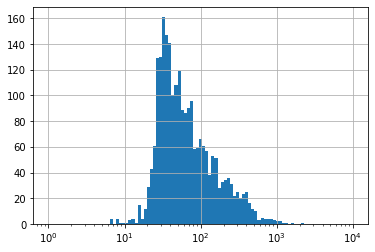

In [138]:
plotDistribution(degrees, 100)

In [63]:
print(nx.info(entityGraph))

Name: 
Type: Graph
Number of nodes: 2386
Number of edges: 120198
Average degree: 100.7527


In [64]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in entityGraph.edges(data=True)})

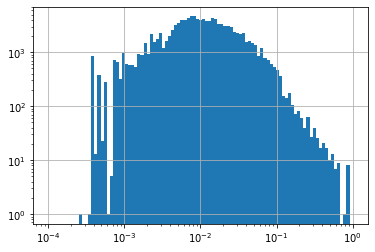

In [65]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")

#### 3.3.2 Created filtered Graph
- previously, nodes_with_low_degree was created by filtering out nodes with a degree threshold, ie it has to have enough connections to other nodes
- BUT, we also want to control for meaningfulness of 2 nodes. Ex: Microsoft and US is related, but not very interesting. Therefore, we will set a edge weight threshold 

In [141]:
# Filter graph with edge weight threshold

filteredEntityGraph = entityGraph.edge_subgraph(
    [edge for edge in entityGraph.edges if entityGraph.edges[edge]["weight"]>0.05]
)

In [142]:
print(nx.info(filteredEntityGraph))

Name: 
Type: Graph
Number of nodes: 2249
Number of edges: 7844
Average degree:   6.9755


#### 3.3.3 Analyze Local and global properties of the entity graph 
- Analyze filtered entity graph

##### 3.3.3.1 Result: Network has a couple of components

In [144]:
globalKpis = [{
    "shortest_path": nx.average_shortest_path_length(_graph),
    "clustering_coefficient": nx.average_clustering(_graph),
    "global_efficiency": nx.global_efficiency(_graph)
} for components in nx.connected_components(filteredEntityGraph) 
    for _graph in [nx.subgraph(filteredEntityGraph, components)]]

In [145]:
pd.concat([
    pd.DataFrame(globalKpis), 
    pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)])
], axis=1)

,shortest_path,clustering_coefficient,global_efficiency,0
0,4.748461,0.213386,0.225512,2236
1,1.333333,0.000000,0.833333,3
2,1.500000,0.000000,0.750000,4
3,1.000000,0.000000,1.000000,2
4,1.000000,0.000000,1.000000,2
5,1.000000,0.000000,1.000000,2


In [146]:
pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)]).sum()

2249

In [147]:
globalKpis[0]

{'shortest_path': 4.748461018197244,
 'clustering_coefficient': 0.2133860558054599,
 'global_efficiency': 0.2255123985502298}

In [151]:
globalKpis[1]

{'shortest_path': 1.3333333333333333,
 'clustering_coefficient': 0.0,
 'global_efficiency': 0.8333333333333334}

In [72]:
# nx.write_gexf(filteredEntityGraph, "filteredEntityGraph.gexf")

##### 3.3.3.2 Result: Relationship between degree, betweeness, and pagerank
- pagerank is correlated to degrees and betweeness

In [148]:
betweeness = nx.betweenness_centrality(filteredEntityGraph)

In [149]:
_betweeness = pd.Series(betweeness)

/Users/chang/.pyenv/versions/3.8.3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


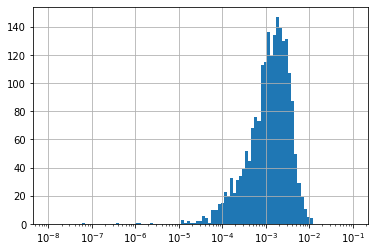

In [150]:
plotDistribution(_betweeness[_betweeness>0], 100)

In [157]:
pageRanks = pd.Series(nx.pagerank(filteredEntityGraph))

In [158]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredEntityGraph)})

In [159]:
kpis = pd.concat({
    "pageRank": pageRanks, 
    "degrees": degrees, 
    "betweeness": _betweeness
}, axis=1)

(1e-05, 0.02)

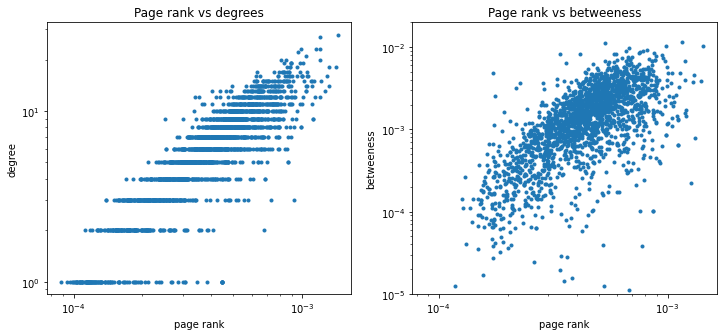

In [160]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("Page rank vs degrees")
plt.plot(kpis["pageRank"], kpis["degrees"], '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("degree")
plt.xscale("log")
plt.yscale("log")

plt.subplot(1,2,2)
plt.title("Page rank vs betweeness")
plt.plot(kpis["pageRank"], kpis["betweeness"], '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1E-5, 2E-2])

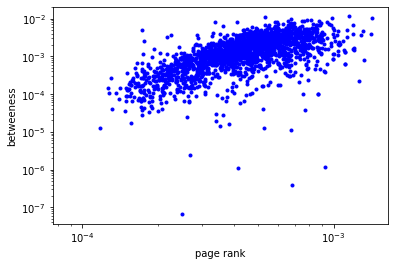

In [161]:
plt.figure(figsize=(6,4))
plt.plot(kpis["pageRank"], kpis["betweeness"], 'b.')
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


Text(0.5, 1.0, 'Edge Weight Distribution')

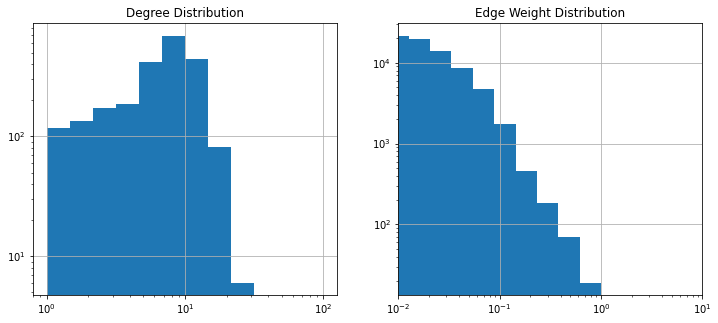

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")


In [82]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredEntityGraph.edges(data=True)})

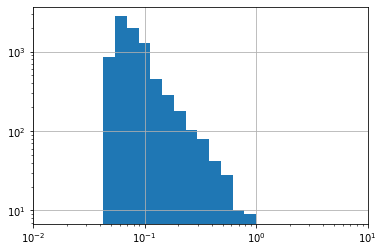

In [83]:
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")

##### 3.3.3.4 Visualization of the Network

In [162]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredEntityGraph)

In [163]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

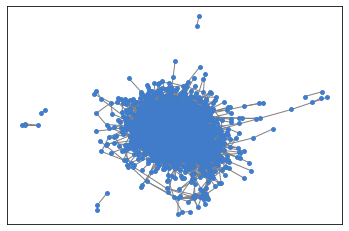

In [167]:
plt.axis("on")
nx.draw_networkx(filteredEntityGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

##### 3.3.3.5 Community detection
- Use community to parition graph; look at the bipartite graph for one partition
- pip install python-louvain

In [171]:
import community.community_louvain

In [181]:
type(filteredEntityGraph)

networkx.classes.graph.Graph

In [184]:
#dict
community.community_louvain.best_partition(filteredEntityGraph)

{'cross': 0,
 'bank said': 1,
 'bundesbank': 2,
 'vista': 3,
 'portland': 4,
 'venture': 5,
 'trades': 6,
 'construction': 7,
 'supermarkets': 8,
 'snyder': 9,
 'public offering': 8,
 'generale': 10,
 'fourth quarter': 0,
 'emergency': 11,
 'target': 12,
 'itc': 13,
 'express': 14,
 'lumber': 14,
 'heritage': 1,
 'refineries': 6,
 'settlement': 9,
 'fda': 13,
 'versus': 15,
 'harcourt': 9,
 'gulf': 12,
 'bills': 16,
 'calif': 3,
 'maximum': 24,
 'oper': 18,
 'considerable': 19,
 'minerals': 20,
 'floor': 21,
 'the world bank': 22,
 'future': 23,
 'diagnostic': 3,
 'banker': 5,
 'predicted': 24,
 'beneficial': 3,
 'factors affecting': 16,
 'plc said': 9,
 'programs': 5,
 'opened': 25,
 'nation': 2,
 'delta': 9,
 'campbell': 22,
 'hanson': 3,
 'forces': 12,
 'reuter': 19,
 'shr primary': 26,
 'approve': 1,
 'georgia': 1,
 'gelco': 10,
 'shrs': 18,
 'acceptance': 6,
 'mitchell': 27,
 'declined': 2,
 'transport': 11,
 'voted': 28,
 'french': 2,
 'crown': 7,
 'valley': 9,
 'istat': 0,
 'coa

In [173]:
communities = pd.Series(community.community_louvain.best_partition(filteredEntityGraph))

Text(0, 0.5, '# Members')

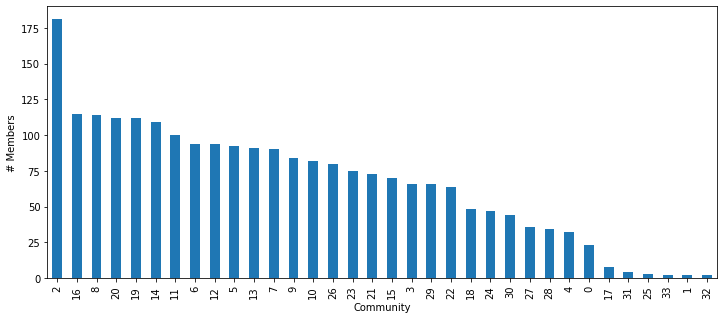

In [174]:
communities.value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5))
plt.xlabel("Community")
plt.ylabel("# Members")

In [180]:
communities # panda series


cross          0
bank said      5
bundesbank     2
vista          3
portland       4
              ..
balance        9
baldrige      19
conversion    20
century       23
payment        4
Length: 2249, dtype: int64

In [197]:
communities.loc["turkish"]

24

In [200]:
# Let's look at one of the neighborhood, associated with turkish
nodes = communities[communities==24].index


In [201]:
nodes

Index(['beneficial', 'turkish', 'delaware', 'recent', 'managed', 'von', 'ual',
       'central', 'final', 'greek', 'simon', 'trump', 'agencies', 'turkey',
       'davis', 'mark iv', 'strategic', 'regional', 'units', 'resorts',
       'represents', 'voting', 'deficiency', 'donald', 'test', 'share payable',
       'liquidating', 'class', 'formed', 'certificate', 'mark', 'cosmetics',
       'greece', 'bear', 'takeovers', 'homes', 'miners', 'lira', 'agreed',
       'gao', 'defense', 'crosby', 'conrac', 'sharing', 'amounts', 'land',
       'ownership'],
      dtype='object')

In [189]:
smallGrap = nx.subgraph(filteredEntityGraph, nbunch=nodes)

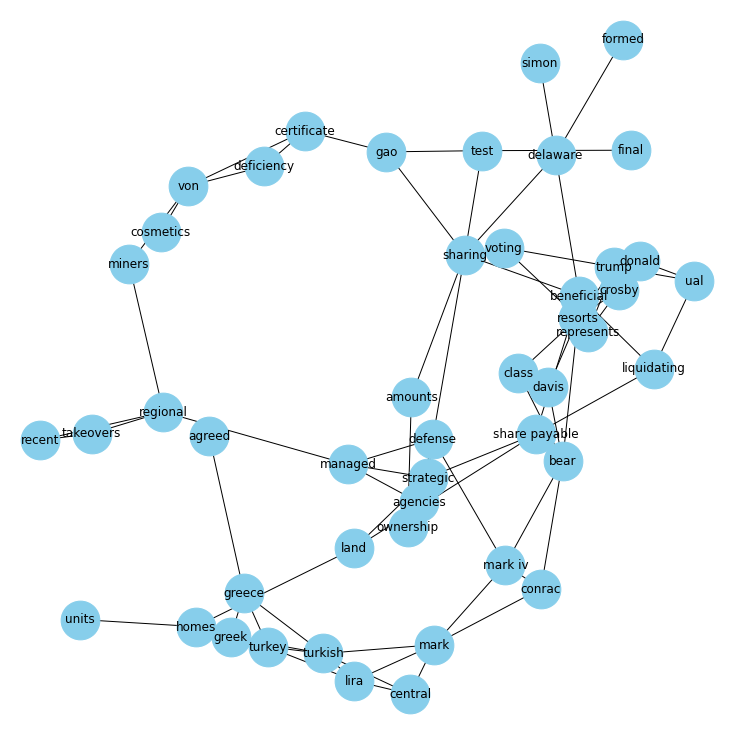

In [202]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(smallGrap) # k regulates the distance between nodes

nx.draw(smallGrap, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "CloseUp.png"), dpi=300, format="png")

Here we show a Bipartite Closeup of the cluster

In [203]:
bipartiteCloseup = subGraph.edge_subgraph(
    {e for e in subGraph.edges() if len(set(e).intersection(nodes))>0}
)

deg = nx.degree(bipartiteCloseup)

smallGrap = nx.subgraph(bipartiteCloseup, {n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==1 or deg[n]>1})

In [204]:
len([n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==0])

487

In [205]:
len(nodes)

47

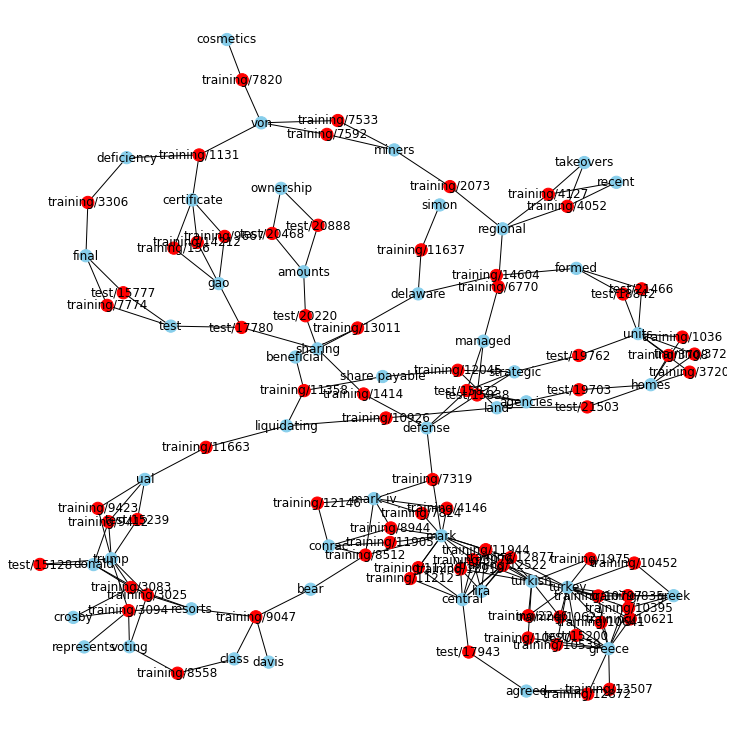

<Figure size 432x288 with 0 Axes>

In [208]:
plt.figure(figsize=(10,10))

pos = nx.kamada_kawai_layout(smallGrap) # k regulates the distance between nodes

# blue is document; red are entities
node_color = ["skyblue" if d["bipartite"]==1 else "red" for n, d in smallGrap.nodes(data=True)]

nx.draw(smallGrap, with_labels=True, node_color=node_color, #'skyblue', 
        node_size=150, edge_cmap=plt.cm.Blues, pos = pos)


plt.show()
plt.savefig(os.path.join(".", "BipartiteCloseUp.png"), dpi=300, format="png")

In [210]:
smallGrap.nodes['test/18842']

{'bipartite': 0}

#### 3.3.4 Embeddings
- Project bipartite nodes to vector space, so similar nodes are close to each other

Using TSNE

In [211]:
from node2vec import Node2Vec

node2vec = Node2Vec(filteredEntityGraph, dimensions=5) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Computing transition probabilities: 100%|█| 2249/2249 [00:02<00:00
Generating walks (CPU: 1): 100%|██| 10/10 [00:46<00:00,  4.63s/it]


In [212]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
embedding2d=tsne.fit_transform(embeddings.vectors)

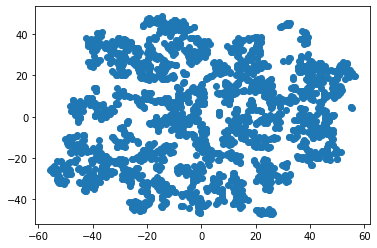

In [213]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

Using Node2Vec

Node2Vec allows also to compute a similarity between entities

In [225]:
embeddings.most_similar(positive=["turkey"])

[('equals', 0.9955942630767822),
 ('inra', 0.9920651316642761),
 ('rubber', 0.9919121861457825),
 ('price index', 0.9912381172180176),
 ('greek', 0.9911616444587708),
 ('ships', 0.989983856678009),
 ('xuto', 0.9847910404205322),
 ('currently', 0.978493869304657),
 ('adjustment', 0.9767205119132996),
 ('statistics institute', 0.9730551242828369)]

In [ ]:
# Save embeddings for notebook on shallow embeddings

In [229]:
from pathlib import Path
Path("./embeddings").mkdir(parents=True, exist_ok=True)

dimensions=5
window=10
pd.DataFrame(embeddings.vectors, index=embeddings.index2word).to_pickle(f"./embeddings/bipartiteGraphEmbeddings_{dimensions}_{window}.p")

### Step3.4: Document-Document Graph Projection

In [232]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph
documentGraph


In [216]:
documentGraph = overlap_weighted_projected_graph(
    G, 
    {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
)

In [230]:
from matplotlib import pyplot as plt

In [233]:
print(nx.info(documentGraph))

Name: 
Type: Graph
Number of nodes: 10788
Number of edges: 12892824
Average degree: 2390.2158


In [238]:
degrees = pd.Series({k: v for k, v in nx.degree(documentGraph) if v and v< 10000})
degrees

training/930      2655
training/12817    3164
training/8822      298
test/16885        1243
test/20837        4296
                  ... 
test/19719        1744
training/696      2860
test/19539        2587
training/12334    4063
training/10567    1379
Length: 10787, dtype: int64

/Users/chang/.pyenv/versions/3.8.3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


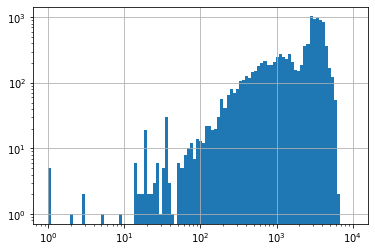

In [239]:
plotDistribution(degrees, 100)
plt.yscale("log")

In [240]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in documentGraph.edges(data=True)})

(0.01, 1)

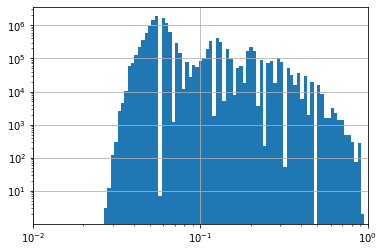

In [241]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-2, 1])

Text(0.5, 1.0, 'Edge Weight Distribution')

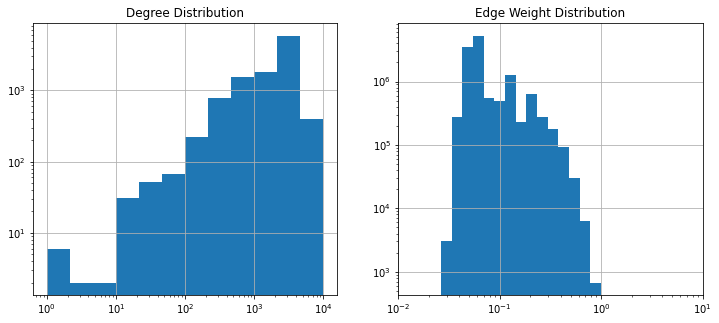

In [242]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")

In [243]:
filteredDocumentGraph = documentGraph.edge_subgraph(
    allEdgesWeights[(allEdgesWeights>0.6)].index.tolist()
)

In [244]:
print(nx.info(filteredDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1969
Number of edges: 7969
Average degree:   8.0945


#### Global and Local Properties

In [245]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredDocumentGraph)})

/Users/chang/.pyenv/versions/3.8.3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


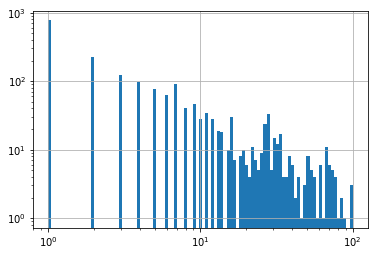

In [246]:
plotDistribution(degrees, 100)
plt.yscale("log")

In [247]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredDocumentGraph.edges(data=True)})

(0.1, 1)

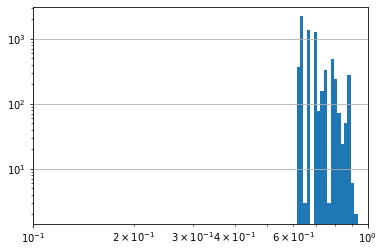

In [248]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

Text(0.5, 1.0, 'Edge Weight Distribution')

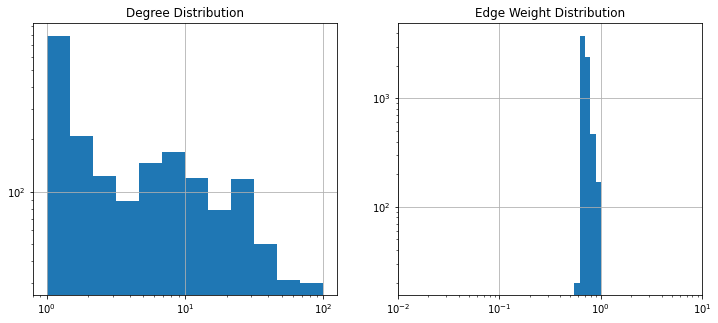

In [120]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")

#### Core - Periphery Description and Analysis
- Filter graph more based on components

In [249]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredDocumentGraph)

In [250]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

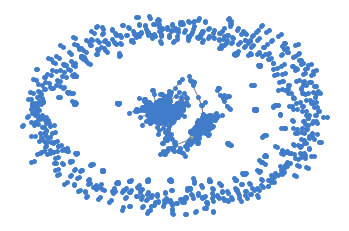

In [251]:
plt.axis("off")
nx.draw_networkx(filteredDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

In [252]:
components = pd.Series({ith: component 
              for ith, component in enumerate(nx.connected_components(filteredDocumentGraph))})

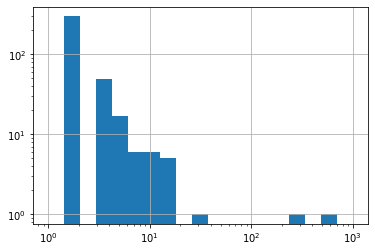

In [253]:
plotDistribution(components.apply(len), nbins=20)
plt.yscale("log")

In [254]:
coreDocumentGraph = nx.subgraph(
    filteredDocumentGraph,
    [node for nodes in components[components.apply(len)>8].values for node in nodes]
)

In [127]:
print(nx.info(coreDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1050
Number of edges: 7112
Average degree:  13.5467


In [128]:
degrees = pd.Series({k: v for k, v in nx.degree(coreDocumentGraph)})

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


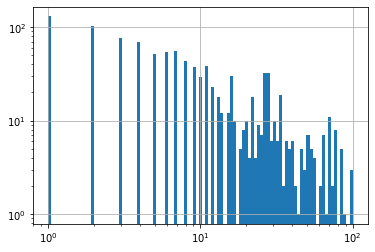

In [129]:
plotDistribution(degrees, 100)
plt.yscale("log")

In [255]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in coreDocumentGraph.edges(data=True)})

(0.1, 1)

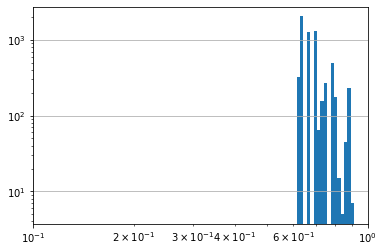

In [131]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

In [256]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(coreDocumentGraph)

In [133]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

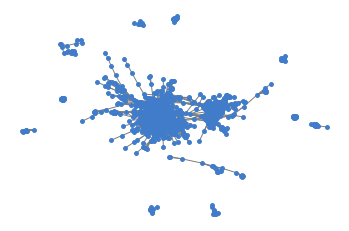

In [257]:
plt.axis("off")
nx.draw_networkx(coreDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community Detection and Topics Clustering

In [258]:
import community.community_louvain

In [259]:
communities = pd.Series(community.community_louvain.best_partition(coreDocumentGraph))

In [260]:
communities = pd.Series(community.community_louvain.best_partition(filteredDocumentGraph))

In [261]:
from collections import Counter

def getTopicRatio(df):
    return Counter([label for labels in df["label"] for label in labels])

In [262]:
communityTopics = pd.DataFrame.from_dict({
    cid: getTopicRatio(corpus.loc[comm.index])
    for cid, comm in communities.groupby(communities)
}, orient="index")

In [263]:
normalizedCommunityTopics = (communityTopics.T / communityTopics.sum(axis=1)).T

<AxesSubplot:>

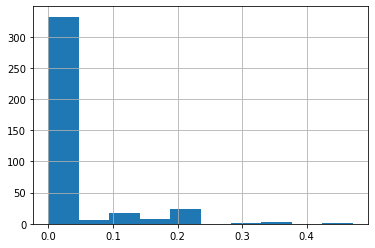

In [264]:
normalizedCommunityTopics.std(axis=1).fillna(0).hist()

Text(0.5, 0, 'Entropy')

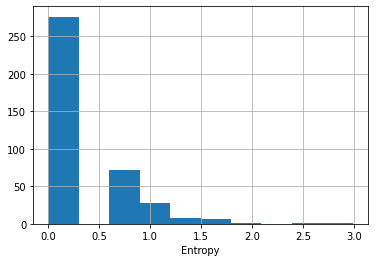

In [265]:
normalizedCommunityTopics.apply(lambda x: np.mean(-np.log(x)), axis=1).hist()
plt.xlabel("Entropy")

In [266]:
topicsCorrelation = normalizedCommunityTopics.corr().fillna(0)
topicsCorrelation[topicsCorrelation<0.8]=0


In [267]:
topicsGraph = nx.from_pandas_adjacency(topicsCorrelation)

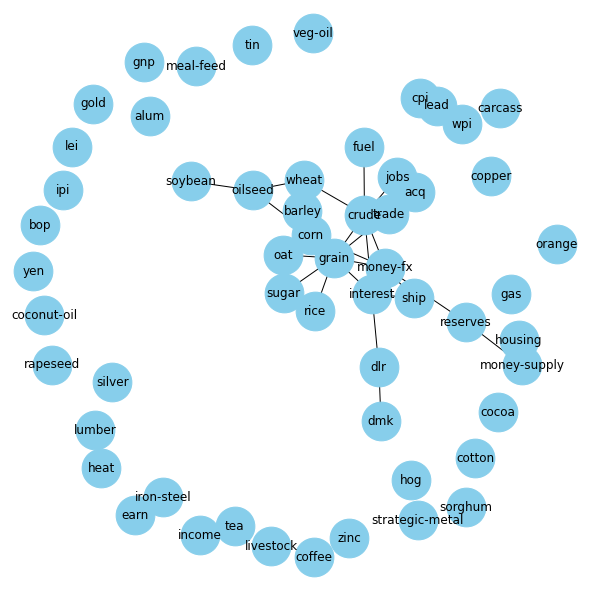

In [268]:
plt.figure(figsize=(8,8))

pos = nx.spring_layout(topicsGraph, k=0.35) # k regulates the distance between nodes

nx.draw(topicsGraph, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "TopicsAll.png"), dpi=300, format="png")

In [269]:
filteredTopicsGraph = nx.subgraph(
    topicsGraph,
    [node for component in nx.connected_components(topicsGraph) if len(component)>3 for node in component]
)

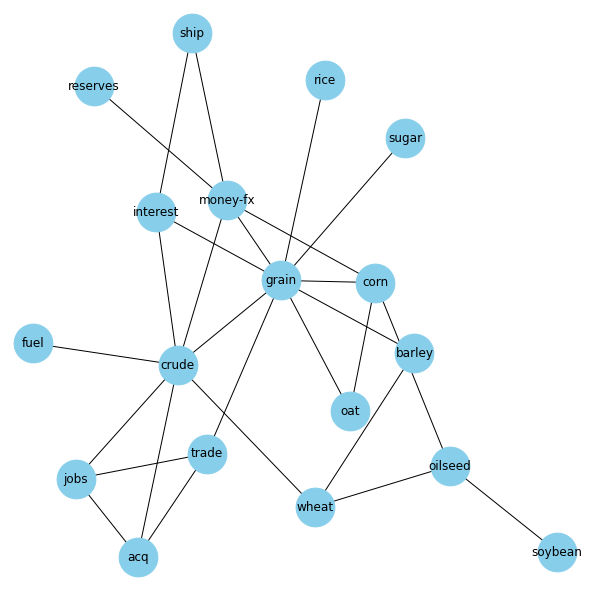

In [147]:
plt.figure(figsize=(8,8))

pos = nx.kamada_kawai_layout(filteredTopicsGraph) # k regulates the distance between nodes

nx.draw(filteredTopicsGraph, with_labels=True, node_color='skyblue', node_size=1500, 
        edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "TopicsCore.png"), dpi=300, format="png")

#### Embeddings for the Document-Document Graph

In [270]:
from node2vec import Node2Vec

node2vec = Node2Vec(coreDocumentGraph, dimensions=20) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Computing transition probabilities: 100%|█| 1068/1068 [00:18<00:00
Generating walks (CPU: 1): 100%|██| 10/10 [00:23<00:00,  2.40s/it]


In [271]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [272]:
embedding2d=tsne.fit_transform(embeddings.vectors)

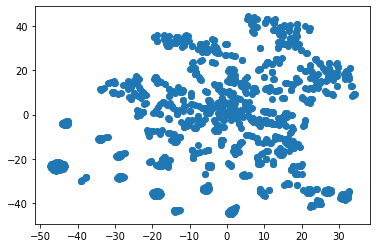

In [273]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

In [274]:
pd.DataFrame(embeddings.vectors)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.739091,-1.510174,-4.990066,-0.910378,-3.673615,-1.513689,0.300788,-2.132831,2.132574,-0.681713,-0.630852,1.260324,-1.223956,-3.240553,-4.872250,-1.587294,0.348952,0.313564,5.031743,6.634141
1,0.592667,-1.264285,-5.186457,-0.711324,-4.798740,-1.396748,0.414005,-1.915787,2.448500,-1.149704,-0.623093,0.977897,-1.492613,-3.145928,-5.249799,-1.526606,0.144700,0.347789,4.955171,6.606315
2,1.109540,-1.505108,-4.935444,-0.655956,-4.318831,-0.851166,0.068861,-2.526476,2.005745,-1.239841,-1.084711,1.338212,-1.385353,-3.288152,-4.549659,-1.670730,0.204801,0.393618,4.751153,6.657422
3,0.417959,-0.818005,-6.701668,1.939976,-0.647524,1.430990,3.345929,-1.200110,0.469141,2.752262,-0.262003,4.044797,1.240608,-2.871000,-5.024383,3.701006,3.204181,-0.742275,3.699685,1.003578
4,2.057850,-0.481950,-4.751023,-0.325440,-4.008386,-0.267066,1.311599,-2.118062,0.673059,-0.189403,-0.554820,5.636501,2.049549,-2.395732,-3.308695,0.175116,0.679043,-1.948753,5.169189,3.498484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.589904,0.398873,0.522491,-0.295207,-0.216805,0.420754,0.012992,1.112001,-0.296403,-0.101816,0.359115,-0.468112,-0.236758,0.770670,0.261376,-0.590671,0.060272,0.074520,-0.094785,-0.532378
1064,0.940706,-0.221681,0.291402,-0.085730,0.287378,0.503523,-0.293436,-0.085602,0.628299,0.205011,0.399598,-0.964860,-0.394926,0.705924,0.601712,-1.075972,0.277303,0.360475,-0.579847,-0.226754
1065,0.285031,0.132232,0.921640,-0.775281,-0.149500,0.161402,-0.523626,-0.174353,0.025345,0.287105,0.052521,-1.308356,0.187315,0.152118,-0.509132,-0.290921,0.382755,0.094228,-0.614226,-0.287852
1066,0.159195,-0.113468,0.717115,-0.137692,-0.026764,-0.252711,-0.636227,-0.298633,-0.510458,-0.180573,-0.004687,0.256369,-0.375296,0.852040,-0.054897,-0.051990,0.148819,1.107120,-0.383011,-0.578056


In [153]:
pd.DataFrame(embeddings.vectors, index=embeddings.index2word)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
test/20368,-0.960548,0.535780,0.385748,1.101508,3.875988,1.070799,-4.849534,-1.820060,-2.966034,1.655846,1.737207,-3.332000,-5.323652,-4.393471,-1.154701,0.506530,-1.585463,-4.248538,2.294325,3.957590
test/20442,-1.162390,0.251178,0.186549,0.988687,3.733672,0.626086,-4.566340,-2.196690,-2.987178,1.805605,2.033937,-3.546881,-4.945525,-4.785186,-0.997341,0.217447,-1.068717,-4.298778,2.283113,3.929447
test/20221,-0.560644,0.339182,0.291281,1.226845,4.163576,0.812360,-4.543347,-2.294925,-2.825094,1.498989,1.761113,-3.436803,-4.634498,-4.171238,-1.194322,0.629293,-1.354635,-4.453906,1.763564,3.575306
test/16715,-2.838000,-0.670331,1.331425,-2.872283,0.375439,4.298521,-0.158841,-0.170265,-2.612220,0.694892,3.447092,-2.284607,-2.858946,-4.312414,-5.989464,-0.026698,-1.416963,-5.212801,-4.163705,-0.600494
test/20800,-2.556705,0.965237,-0.061232,1.352170,4.276524,1.577441,-2.324412,-0.380508,-2.863870,1.455134,3.609730,-4.132732,-2.480354,-0.950713,-2.587649,0.175977,-1.113148,-5.748485,-2.448518,1.200612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test/20255,0.331984,0.523769,0.103705,0.561897,0.521912,-0.852221,-1.032729,0.337699,0.679176,0.848446,-0.056654,-0.641469,-0.082838,0.306723,-0.225306,-0.910874,-0.478912,-0.061075,-0.083310,-0.278903
test/20266,0.166020,-0.576071,0.473827,-0.074774,0.542515,-0.566927,0.635151,0.547837,0.188676,-0.798186,-0.598822,0.590872,-0.403117,0.617905,1.012607,0.195247,0.337702,0.182143,0.600068,-0.636223
training/10885,0.471930,-0.705889,0.055459,-0.975193,0.099381,-0.253793,0.181459,-0.095714,0.663958,-1.006062,-0.361706,0.433246,1.090418,0.211187,-0.207774,-0.705345,0.371806,0.108446,0.908669,-1.126879
training/11154,-0.236891,0.118807,-0.029381,-0.073577,-0.089825,0.016194,0.573447,-0.264896,0.540209,-0.282678,-0.073139,0.051319,0.419923,0.305243,-0.105601,-0.014267,-0.833588,0.948402,0.214101,0.181394


In [154]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25752
Number of edges: 100311
Average degree:   7.7905


Extracting the embeddings to be used in shallow-learning models. Please do vary the *dimensions* and the *window* parameters to generate multiple combination to be cross-validated

In [276]:
from pathlib import Path
Path("./embeddings").mkdir(parents=True, exist_ok=True)




In [277]:
from node2vec import Node2Vec

dimensions = 10
window = 20

node2vec = Node2Vec(G, dimensions=dimensions) 
model = node2vec.fit(window=window) 
embeddings = model.wv 

pd.DataFrame(embeddings.vectors, index=embeddings.index2word)\
    .to_pickle(f"./embeddings/bipartiteGraphEmbeddings_{dimensions}_{window}.p")

Computing transition probabilities: 100%|█| 25478/25478 [01:33<00:
Generating walks (CPU: 1): 100%|██| 10/10 [13:43<00:00, 82.39s/it]
